In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('adult.data')

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Target']

In [5]:
df.columns = headers

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.shape

(32560, 15)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Target            object
dtype: object

In [11]:
df['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
more_than_50k = df[df['Target'].str.strip()=='>50K']
less_than_50k = df[df['Target'].str.strip()=='<=50K']

In [13]:
less_than_50k.shape

(24719, 15)

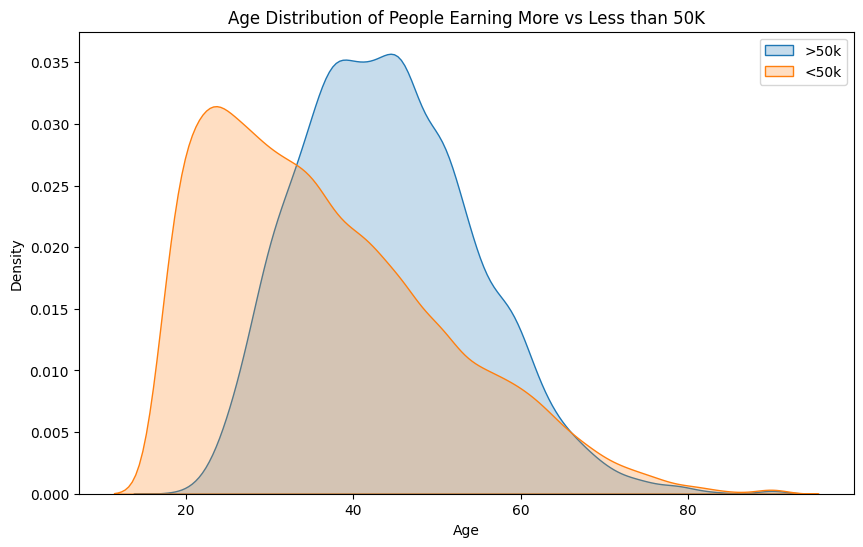

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = more_than_50k,x='age' ,label='>50k', fill=True )
sns.kdeplot(data=less_than_50k,x='age', label='<50k', fill= True)
plt.title('Age Distribution of People Earning More vs Less than 50K')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

## Key Take away from this plot
Younger individuals (below 30) are more likely to earn less than $50K.<br>
Older individuals (around 50+) are more likely to earn more than $50K.<br>
There is a positive correlation between age and earning.



In [15]:
more_than_50k['hours-per-week'].mean()

45.473026399693914

In [16]:
less_than_50k['hours-per-week'].mean()

38.840163437032245

In [17]:
df['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

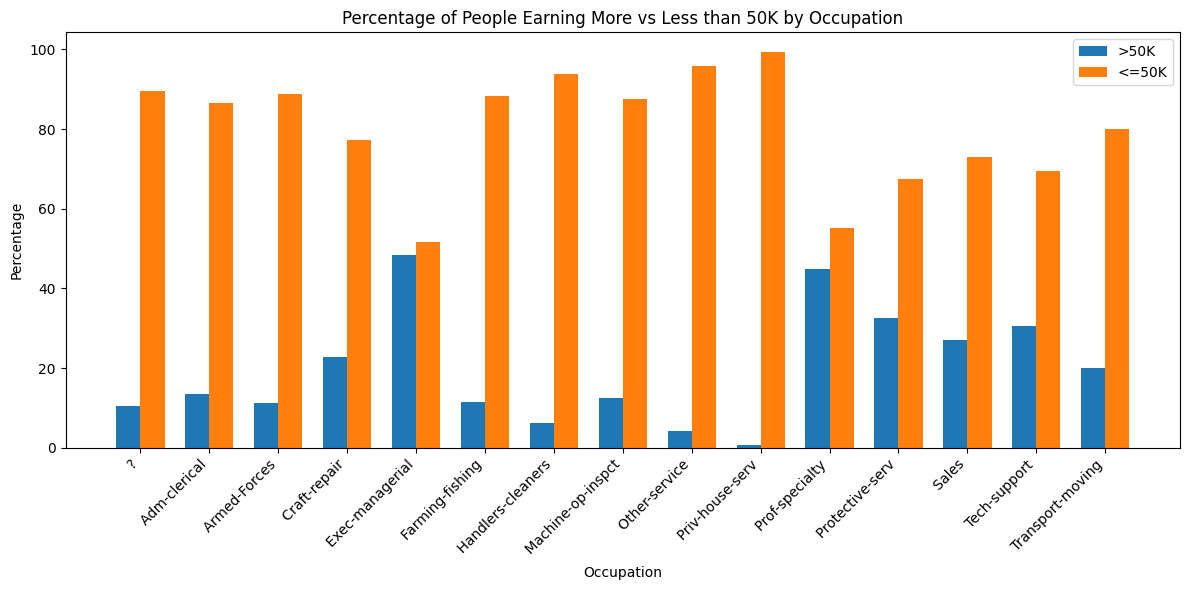

In [18]:
occupation_counts = more_than_50k['occupation'].value_counts()
total_occupation_value = df['occupation'].value_counts()
percent_occupation = (occupation_counts/total_occupation_value)*100
occupation_less_than_50k = (less_than_50k['occupation'].value_counts() / df['occupation'].value_counts()) * 100
occupation_comparison = pd.DataFrame({
    '>50K': percent_occupation,
    '<=50K': occupation_less_than_50k
})
occupation_comparison = occupation_comparison.dropna()
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(occupation_comparison))
bar1 = ax.bar(index, occupation_comparison['>50K'], bar_width, label='>50K')
bar2 = ax.bar(index + bar_width, occupation_comparison['<=50K'], bar_width, label='<=50K')
ax.set_xlabel('Occupation')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of People Earning More vs Less than 50K by Occupation')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(occupation_comparison.index, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


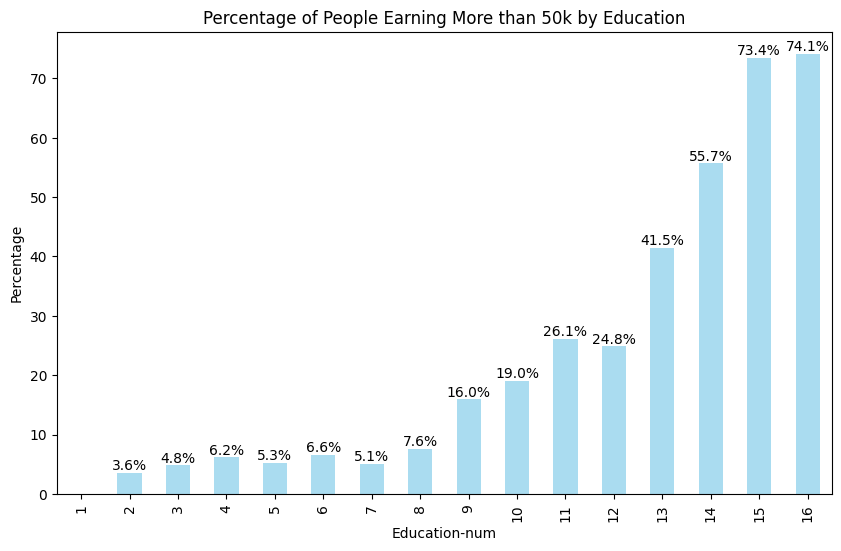

In [19]:
# Calculate percentage and sort by index (education-num) to ensure correct order
percent_of_people = (more_than_50k['education-num'].value_counts() / df['education-num'].value_counts()).sort_index() * 100

# Plotting the data
plt.figure(figsize=(10,6))
ax = percent_of_people.plot(kind='bar', color='skyblue', label='>50K Percentage', alpha=0.7)

# Adding percentage labels athe bars
for i, percent in enumerate(percent_of_people):
    ax.text(i, percent + 0.5, f'{percent:.1f}%', ha='center', fontsize=10, color='black')

# Titles and labels
plt.title('Percentage of People Earning More than 50k by Education')
plt.xlabel('Education-num')
plt.ylabel('Percentage')
plt.show()


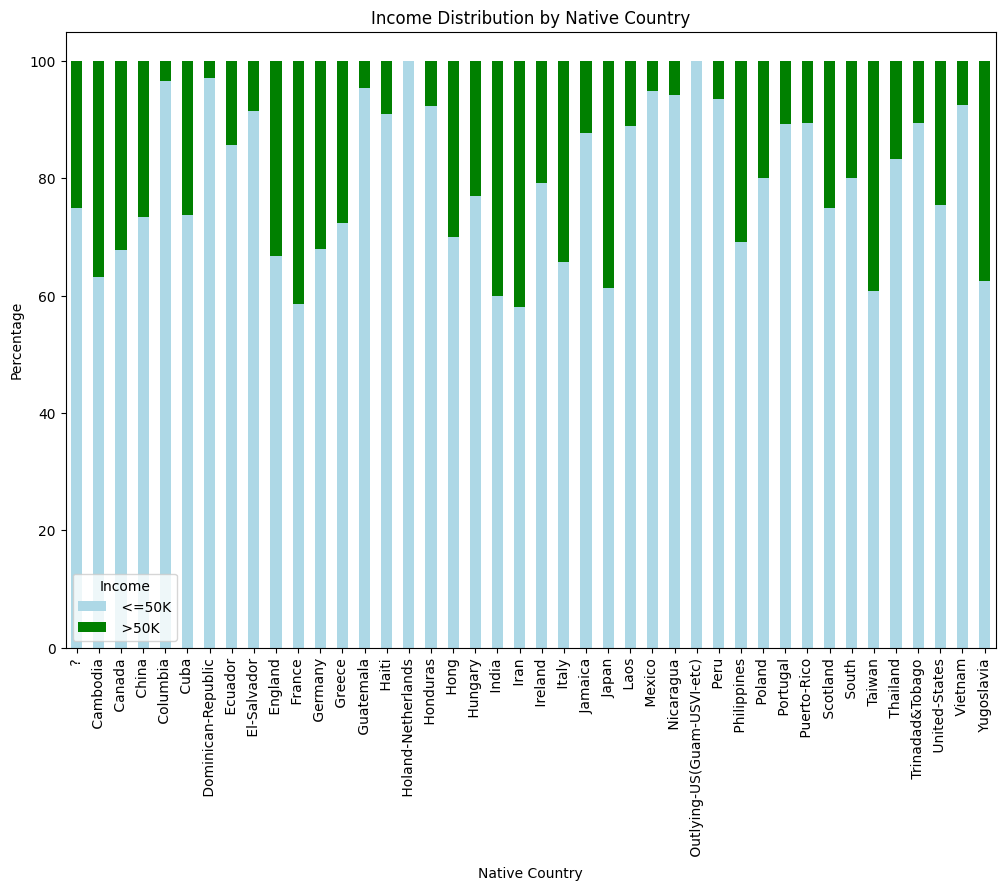

In [20]:
# Group data by native-country and income
country_income = df.groupby(['native-country', 'Target']).size().unstack().fillna(0)

# Normalize the data to show percentages
country_income = country_income.div(country_income.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
country_income.plot(kind='bar', stacked=True, figsize=(12,8), color=['lightblue', 'green'])
plt.title('Income Distribution by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Percentage')
plt.legend(title='Income')
plt.xticks(rotation=90)
plt.show()


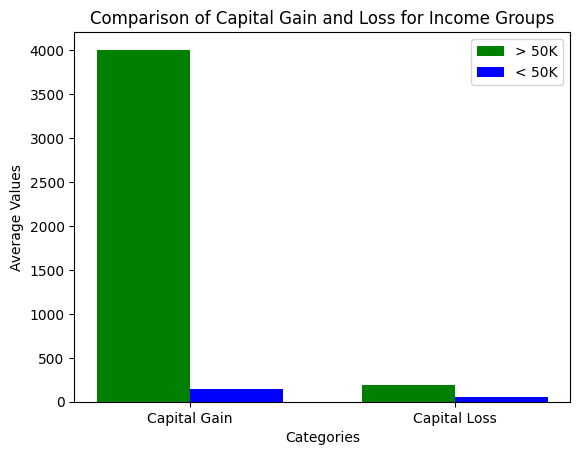

In [21]:

capital_gain_more_than_50K = more_than_50k['capital-gain'].mean()
capital_gain_less_than_50K = less_than_50k['capital-gain'].mean()
capital_loss_more_than_50K = more_than_50k['capital-loss'].mean()
capital_loss_less_than_50K = less_than_50k['capital-loss'].mean()


categories = ['Capital Gain', 'Capital Loss']
more_than_50K = [capital_gain_more_than_50K, capital_loss_more_than_50K]
less_than_50K = [capital_gain_less_than_50K, capital_loss_less_than_50K]

x = np.arange(len(categories))


bar_width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, more_than_50K, bar_width, label='> 50K', color='green')
bar2 = ax.bar(x + bar_width/2, less_than_50K, bar_width, label='< 50K', color='blue')


ax.set_xlabel('Categories')
ax.set_ylabel('Average Values')
ax.set_title('Comparison of Capital Gain and Loss for Income Groups')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


plt.show()



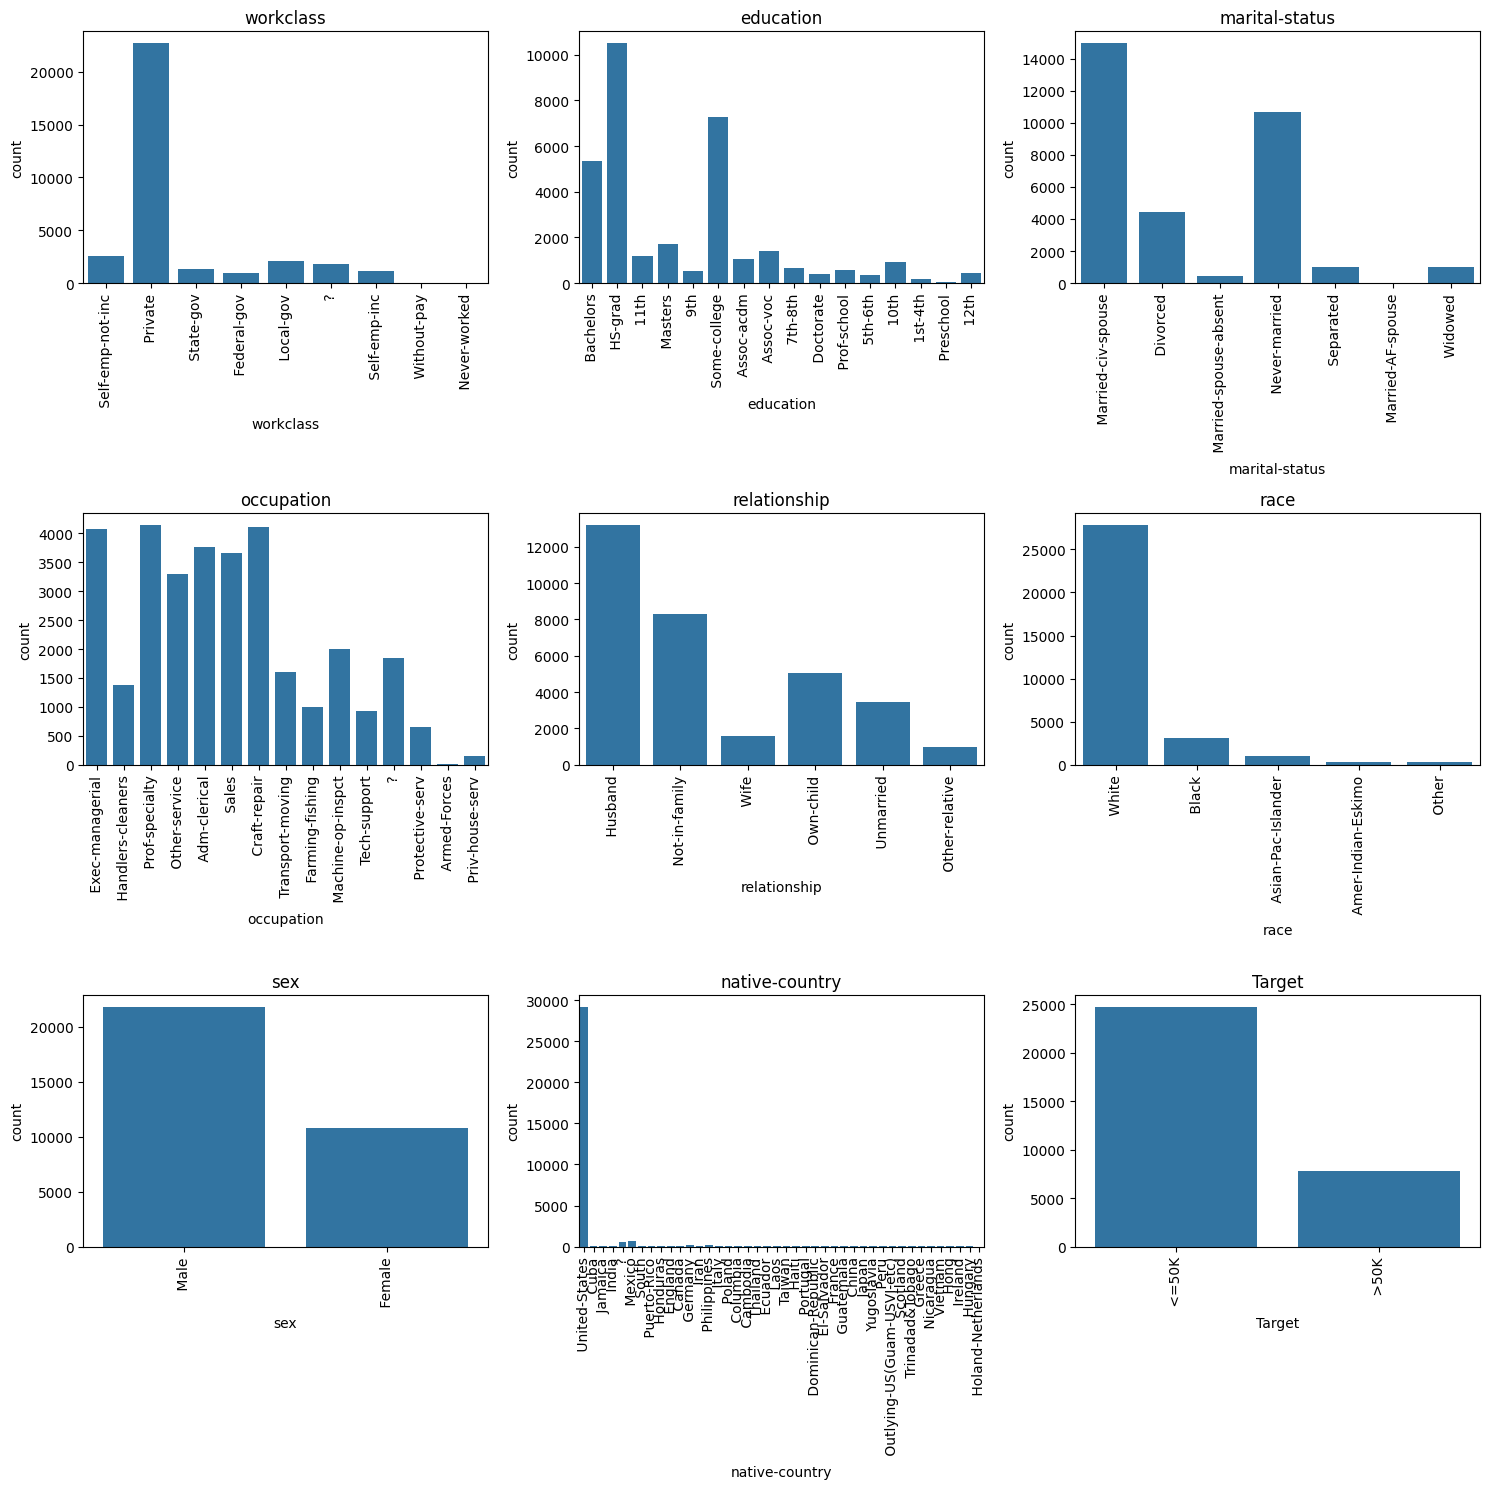

In [22]:
# Get the names of all columns with data type 'object' (categorical columns) excluding 'Country'
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

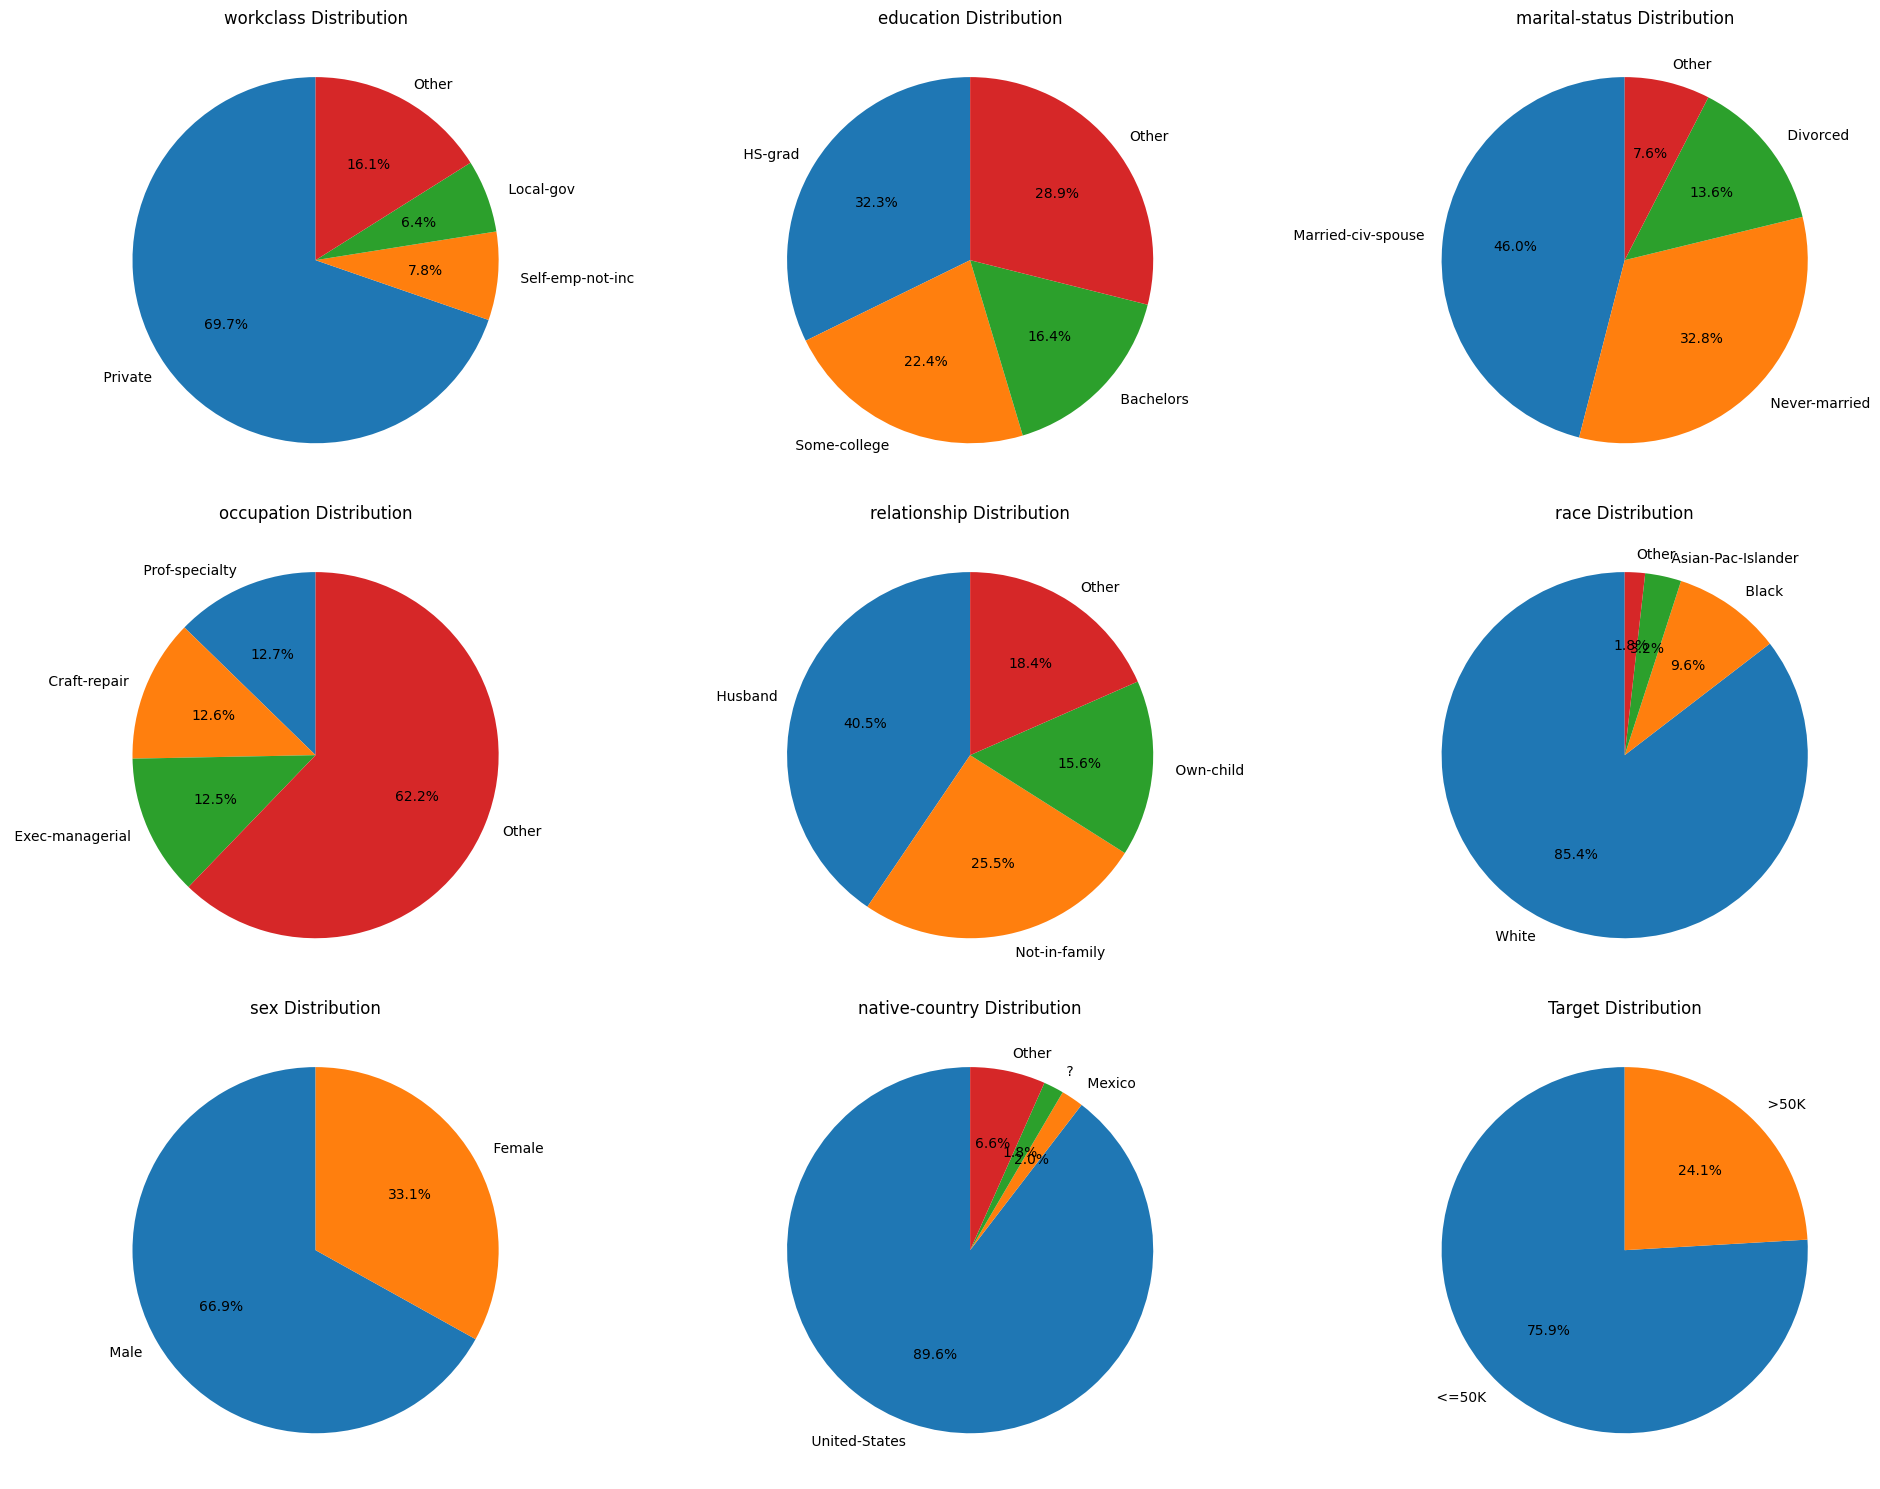

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the maximum number of categories to show individually
max_categories = 3

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()
        
        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts.nlargest(max_categories)
            other_count = cat_counts.sum() - cat_counts_top.sum()
            cat_counts_final = pd.concat([cat_counts_top, pd.Series({'Other': other_count})])
        else:
            cat_counts_final = cat_counts
        
        # Create a pie chart
        axs[i].pie(cat_counts_final.values, labels=cat_counts_final.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()

In [24]:
from sklearn import preprocessing
for col in df.select_dtypes(include='object').columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col} {df[col].unique()}')

workclass [6 4 7 1 2 0 5 8 3]
education [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital-status [2 0 3 4 5 1 6]
occupation [ 4  6 10  8  1 12  3 14  5  7 13  0 11  2  9]
relationship [0 1 5 3 4 2]
race [4 2 1 0 3]
sex [1 0]
native-country [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
Target [0 1]


<Axes: >

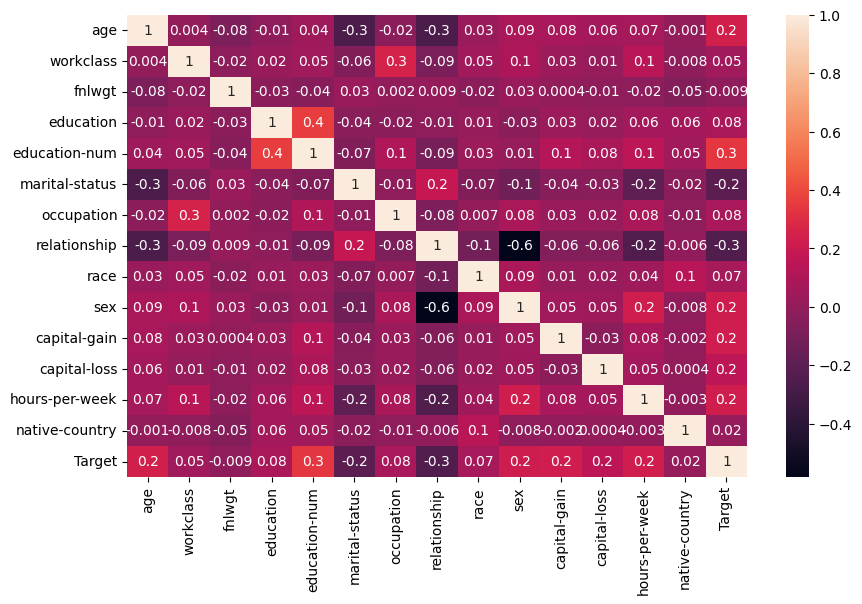

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),fmt='.1g',annot=True)